In [1]:
# 분석 라이브러리 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Open API 활용
import requests
from bs4 import BeautifulSoup
import os
import json

# 경고 문구 미표시
import warnings
warnings.filterwarnings(action='ignore')

# 한글깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
api_key = '486d6f584f6c796b343543616f4573'
file_type = 'json'
service_name = 'BukChonInOutPeopleInfo'
url = f'http://openapi.seoul.go.kr:8088/{api_key}/{file_type}/{service_name}/1/5/'

url = os.path.join(url)
url

'http://openapi.seoul.go.kr:8088/486d6f584f6c796b343543616f4573/json/BukChonInOutPeopleInfo/1/5/'

In [3]:
response = requests.get(url)

In [4]:
response.text

'{"BukChonInOutPeopleInfo":{"list_total_count":29261,"RESULT":{"CODE":"INFO-000","MESSAGE":"정상 처리되었습니다"},"row":[{"DEVICEID":2.0,"DEVICENAME":"계동길 69","DESCRIPTION":"계동교회 앞","STARTTIME":"2022-11-30 21:10:41","ENDTIME":"2022-11-30 21:20:41","INCOUNT":9386.0,"OUTCOUNT":13749.0},{"DEVICEID":1.0,"DEVICENAME":"율곡로3길 50","DESCRIPTION":"덕성여고 앞","STARTTIME":"2022-11-30 21:10:41","ENDTIME":"2022-11-30 21:20:41","INCOUNT":7903.0,"OUTCOUNT":5279.0},{"DEVICEID":2.0,"DEVICENAME":"계동길 69","DESCRIPTION":"계동교회 앞","STARTTIME":"2022-11-30 21:20:41","ENDTIME":"2022-11-30 21:30:41","INCOUNT":9398.0,"OUTCOUNT":13776.0},{"DEVICEID":1.0,"DEVICENAME":"율곡로3길 50","DESCRIPTION":"덕성여고 앞","STARTTIME":"2022-11-30 21:20:41","ENDTIME":"2022-11-30 21:30:41","INCOUNT":7927.0,"OUTCOUNT":5312.0},{"DEVICEID":2.0,"DEVICENAME":"계동길 69","DESCRIPTION":"계동교회 앞","STARTTIME":"2022-11-30 21:30:41","ENDTIME":"2022-11-30 21:40:41","INCOUNT":9414.0,"OUTCOUNT":13800.0}]}}'

In [5]:
df = pd.DataFrame()
for i in range(1, 30000, 1000):
    url = f'http://openapi.seoul.go.kr:8088/{api_key}/{file_type}/{service_name}/{i}/{i+999}/'
    response = requests.get(url)
    data = response.text
    dict_data = json.loads(data)
    tmp = pd.DataFrame(dict_data['BukChonInOutPeopleInfo']['row'])
    df = pd.concat([df, tmp])

In [6]:
df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT
0,2.0,계동길 69,계동교회 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,9386.0,13749.0
1,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,7903.0,5279.0
2,2.0,계동길 69,계동교회 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,9398.0,13776.0
3,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,7927.0,5312.0
4,2.0,계동길 69,계동교회 앞,2022-11-30 21:30:41,2022-11-30 21:40:41,9414.0,13800.0
...,...,...,...,...,...,...,...
256,2.0,계동길 69,계동교회 앞,2023-02-06 14:40:41,2023-02-06 14:50:41,5117.0,6166.0
257,1.0,율곡로3길 50,덕성여고 앞,2023-02-06 14:50:41,2023-02-06 15:00:41,4578.0,2811.0
258,2.0,계동길 69,계동교회 앞,2023-02-06 14:50:41,2023-02-06 15:00:41,5227.0,6269.0
259,1.0,율곡로3길 50,덕성여고 앞,2023-02-06 15:00:41,2023-02-06 15:10:41,4680.0,2903.0


In [7]:
df.shape

(29261, 7)

In [8]:
df.to_csv('bukchon.csv',index = False)

In [9]:
df = pd.read_csv('bukchon.csv')
df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT
0,2.0,계동길 69,계동교회 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,9386.0,13749.0
1,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,7903.0,5279.0
2,2.0,계동길 69,계동교회 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,9398.0,13776.0
3,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,7927.0,5312.0
4,2.0,계동길 69,계동교회 앞,2022-11-30 21:30:41,2022-11-30 21:40:41,9414.0,13800.0
...,...,...,...,...,...,...,...
29256,2.0,계동길 69,계동교회 앞,2023-02-06 14:40:41,2023-02-06 14:50:41,5117.0,6166.0
29257,1.0,율곡로3길 50,덕성여고 앞,2023-02-06 14:50:41,2023-02-06 15:00:41,4578.0,2811.0
29258,2.0,계동길 69,계동교회 앞,2023-02-06 14:50:41,2023-02-06 15:00:41,5227.0,6269.0
29259,1.0,율곡로3길 50,덕성여고 앞,2023-02-06 15:00:41,2023-02-06 15:10:41,4680.0,2903.0


In [10]:
df['TOTAL'] = df['INCOUNT'] + df['OUTCOUNT']
df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,TOTAL
0,2.0,계동길 69,계동교회 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,9386.0,13749.0,23135.0
1,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,7903.0,5279.0,13182.0
2,2.0,계동길 69,계동교회 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,9398.0,13776.0,23174.0
3,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,7927.0,5312.0,13239.0
4,2.0,계동길 69,계동교회 앞,2022-11-30 21:30:41,2022-11-30 21:40:41,9414.0,13800.0,23214.0
...,...,...,...,...,...,...,...,...
29256,2.0,계동길 69,계동교회 앞,2023-02-06 14:40:41,2023-02-06 14:50:41,5117.0,6166.0,11283.0
29257,1.0,율곡로3길 50,덕성여고 앞,2023-02-06 14:50:41,2023-02-06 15:00:41,4578.0,2811.0,7389.0
29258,2.0,계동길 69,계동교회 앞,2023-02-06 14:50:41,2023-02-06 15:00:41,5227.0,6269.0,11496.0
29259,1.0,율곡로3길 50,덕성여고 앞,2023-02-06 15:00:41,2023-02-06 15:10:41,4680.0,2903.0,7583.0


In [11]:
df['INFLOW'] = df['INCOUNT'] - df['OUTCOUNT']
df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,TOTAL,INFLOW
0,2.0,계동길 69,계동교회 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,9386.0,13749.0,23135.0,-4363.0
1,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,7903.0,5279.0,13182.0,2624.0
2,2.0,계동길 69,계동교회 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,9398.0,13776.0,23174.0,-4378.0
3,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,7927.0,5312.0,13239.0,2615.0
4,2.0,계동길 69,계동교회 앞,2022-11-30 21:30:41,2022-11-30 21:40:41,9414.0,13800.0,23214.0,-4386.0
...,...,...,...,...,...,...,...,...,...
29256,2.0,계동길 69,계동교회 앞,2023-02-06 14:40:41,2023-02-06 14:50:41,5117.0,6166.0,11283.0,-1049.0
29257,1.0,율곡로3길 50,덕성여고 앞,2023-02-06 14:50:41,2023-02-06 15:00:41,4578.0,2811.0,7389.0,1767.0
29258,2.0,계동길 69,계동교회 앞,2023-02-06 14:50:41,2023-02-06 15:00:41,5227.0,6269.0,11496.0,-1042.0
29259,1.0,율곡로3길 50,덕성여고 앞,2023-02-06 15:00:41,2023-02-06 15:10:41,4680.0,2903.0,7583.0,1777.0


In [12]:
df['STARTTIME'] = pd.to_datetime(df['STARTTIME'])
df['YEAR'] = df['STARTTIME'].dt.year
df['MONTH'] = df['STARTTIME'].dt.month
df['DAY'] = df['STARTTIME'].dt.day
df['WEEKDAY_NUM'] = df['STARTTIME'].dt.weekday
df['HOUR'] = df['STARTTIME'].dt.hour
df.head()

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,TOTAL,INFLOW,YEAR,MONTH,DAY,WEEKDAY_NUM,HOUR
0,2.0,계동길 69,계동교회 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,9386.0,13749.0,23135.0,-4363.0,2022,11,30,2,21
1,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,7903.0,5279.0,13182.0,2624.0,2022,11,30,2,21
2,2.0,계동길 69,계동교회 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,9398.0,13776.0,23174.0,-4378.0,2022,11,30,2,21
3,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,7927.0,5312.0,13239.0,2615.0,2022,11,30,2,21
4,2.0,계동길 69,계동교회 앞,2022-11-30 21:30:41,2022-11-30 21:40:41,9414.0,13800.0,23214.0,-4386.0,2022,11,30,2,21


In [13]:
df.set_index('STARTTIME', inplace = True)
df.head()

,DEVICEID,DEVICENAME,DESCRIPTION,ENDTIME,INCOUNT,OUTCOUNT,TOTAL,INFLOW,YEAR,MONTH,DAY,WEEKDAY_NUM,HOUR
STARTTIME,,,,,,,,,,,,,
2022-11-30 21:10:41,2.0,계동길 69,계동교회 앞,2022-11-30 21:20:41,9386.0,13749.0,23135.0,-4363.0,2022,11,30,2,21
2022-11-30 21:10:41,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:20:41,7903.0,5279.0,13182.0,2624.0,2022,11,30,2,21
2022-11-30 21:20:41,2.0,계동길 69,계동교회 앞,2022-11-30 21:30:41,9398.0,13776.0,23174.0,-4378.0,2022,11,30,2,21
2022-11-30 21:20:41,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:30:41,7927.0,5312.0,13239.0,2615.0,2022,11,30,2,21
2022-11-30 21:30:41,2.0,계동길 69,계동교회 앞,2022-11-30 21:40:41,9414.0,13800.0,23214.0,-4386.0,2022,11,30,2,21


### 시각화

#### 장소별 유동인구

In [ ]:
des_data = df.groupby('DESCRIPTION')[['INCOUNT', 'OUTCOUNT']].mean()
des_data

,INCOUNT,OUTCOUNT
DESCRIPTION,,
계동교회 앞,4236.827362,5445.957444
덕성여고 앞,2755.443787,2071.900177
삼청파출소 사잇길,1804.273328,2199.650467


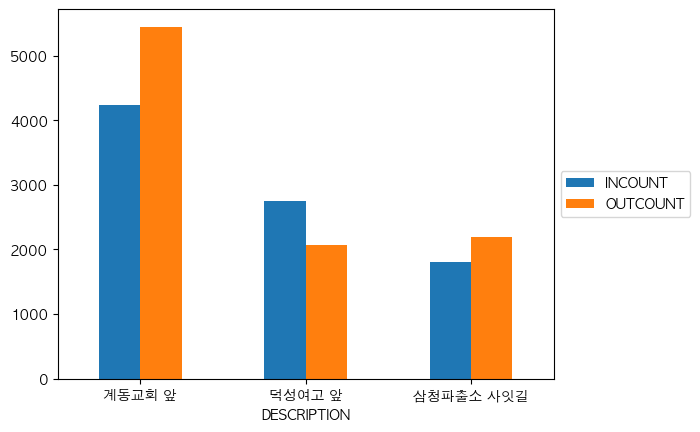

In [ ]:
des_data.plot(kind = 'bar')
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### 연도별 유동인구

In [ ]:
year_data = df.groupby('YEAR')[['INCOUNT', 'OUTCOUNT']].mean()
year_data

,INCOUNT,OUTCOUNT
YEAR,,
2022,3944.498536,4285.149572
2023,2323.347145,2538.948539


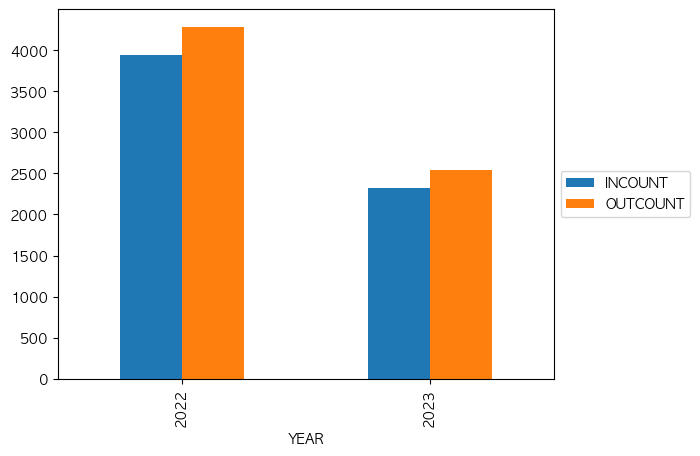

In [ ]:
year_data.plot(kind = 'bar')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### 월별 유동인구

In [ ]:
month_data = df.groupby('MONTH')[['INCOUNT', 'OUTCOUNT']].mean()
month_data

,INCOUNT,OUTCOUNT
MONTH,,
1,2337.616834,2541.212343
2,2244.841713,2526.494103
11,5143.213724,5670.796554
12,2602.283764,2733.625183


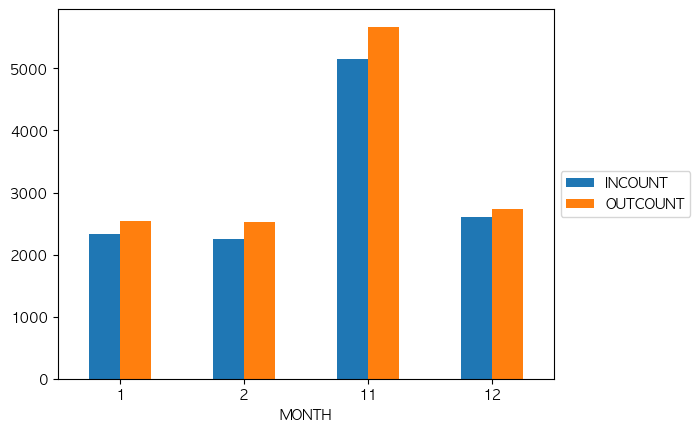

In [ ]:
month_data.plot(kind = 'bar')
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### 시간별 유동인구

In [ ]:
hour_data = df.groupby('HOUR')[['INCOUNT', 'OUTCOUNT']].mean()
hour_data.head()

,INCOUNT,OUTCOUNT
HOUR,,
0,36.104184,39.454471
1,81.668293,97.519512
2,117.290244,154.426829
3,145.868293,206.935772
4,177.011382,263.754472


<AxesSubplot:xlabel='HOUR'>

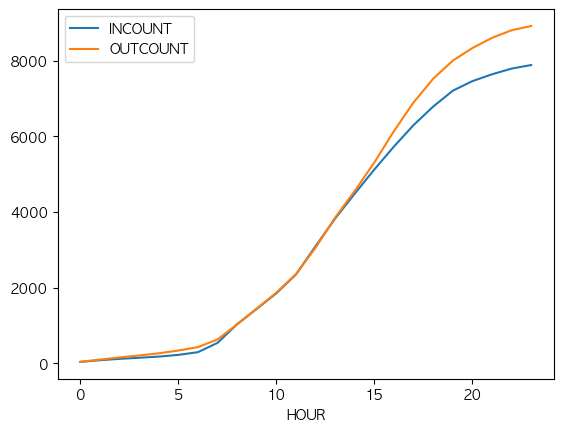

In [ ]:
hour_data.plot(kind = 'line')

<AxesSubplot:xlabel='HOUR', ylabel='INCOUNT'>

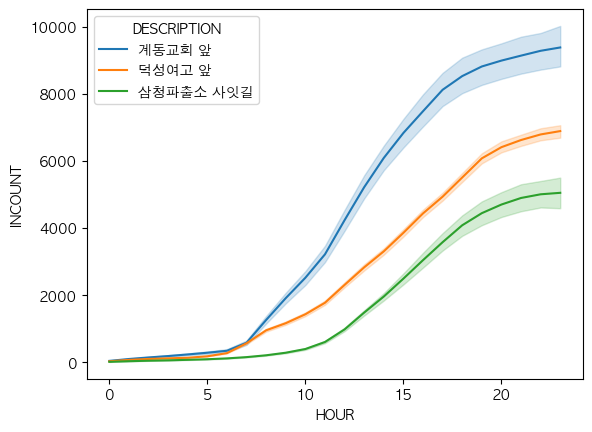

In [ ]:
sns.lineplot(data = df, x = 'HOUR', y = 'INCOUNT', hue = 'DESCRIPTION')

<AxesSubplot:xlabel='HOUR', ylabel='OUTCOUNT'>

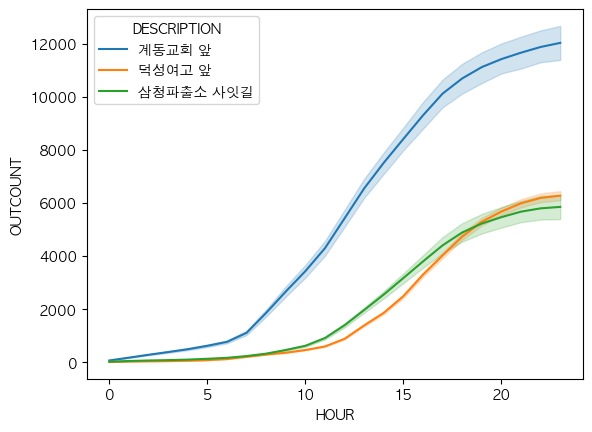

In [ ]:
sns.lineplot(data = df, x = 'HOUR', y = 'OUTCOUNT', hue = 'DESCRIPTION')

#### 요일별 유동인구

In [ ]:
week_data = df.groupby(['WEEKDAY_NUM'])[['INCOUNT', 'OUTCOUNT']].mean()
week_data

,INCOUNT,OUTCOUNT
WEEKDAY_NUM,,
0,3366.144355,3682.569861
1,3474.609598,3545.821295
2,3737.862853,3846.349988
3,3798.618415,3926.198135
4,3856.392166,3955.131266
5,2803.319496,3479.133162
6,2544.677780,3191.091630


Text(0.5, 0, '요일')

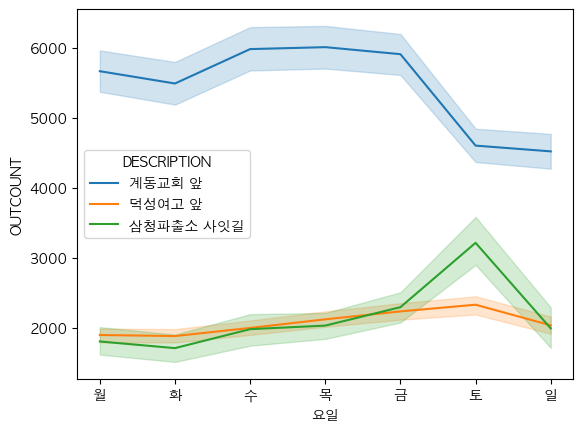

In [ ]:
sns.lineplot(data = df, x = 'WEEKDAY_NUM', y = 'OUTCOUNT', hue = 'DESCRIPTION')
plt.xticks([0,1,2,3,4,5,6],['월','화','수','목','금','토','일'])
plt.xlabel('요일')

In [14]:
df['DEVICEID'].value_counts()

2.0    13676
1.0    13013
4.0     2572
Name: DEVICEID, dtype: int64

<AxesSubplot:xlabel='DEVICEID', ylabel='count'>

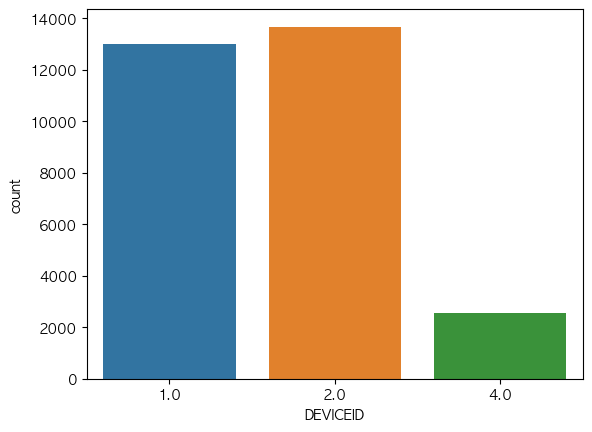

In [15]:
# seaborn 라이브러리의 countplot 함수
sns.countplot(data=df, x='DEVICEID')


In [16]:
# DEVICEID가 2인 데이터를 df_two 변수에 저장합니다. 
df_two = df[df['DEVICEID']==2.0]
df_two.head()

,DEVICEID,DEVICENAME,DESCRIPTION,ENDTIME,INCOUNT,OUTCOUNT,TOTAL,INFLOW,YEAR,MONTH,DAY,WEEKDAY_NUM,HOUR
STARTTIME,,,,,,,,,,,,,
2022-11-30 21:10:41,2.0,계동길 69,계동교회 앞,2022-11-30 21:20:41,9386.0,13749.0,23135.0,-4363.0,2022,11,30,2,21
2022-11-30 21:20:41,2.0,계동길 69,계동교회 앞,2022-11-30 21:30:41,9398.0,13776.0,23174.0,-4378.0,2022,11,30,2,21
2022-11-30 21:30:41,2.0,계동길 69,계동교회 앞,2022-11-30 21:40:41,9414.0,13800.0,23214.0,-4386.0,2022,11,30,2,21
2022-11-30 23:00:41,2.0,계동길 69,계동교회 앞,2022-11-30 23:10:41,9625.0,14105.0,23730.0,-4480.0,2022,11,30,2,23
2022-11-30 21:40:41,2.0,계동길 69,계동교회 앞,2022-11-30 21:50:41,9441.0,13852.0,23293.0,-4411.0,2022,11,30,2,21


In [17]:
# DEVICEID가 1인 데이터를 df_two 변수에 저장합니다. 
df_one = df[df['DEVICEID']==1.0]
df_one.head()

,DEVICEID,DEVICENAME,DESCRIPTION,ENDTIME,INCOUNT,OUTCOUNT,TOTAL,INFLOW,YEAR,MONTH,DAY,WEEKDAY_NUM,HOUR
STARTTIME,,,,,,,,,,,,,
2022-11-30 21:10:41,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:20:41,7903.0,5279.0,13182.0,2624.0,2022,11,30,2,21
2022-11-30 21:20:41,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:30:41,7927.0,5312.0,13239.0,2615.0,2022,11,30,2,21
2022-11-30 21:30:41,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:40:41,7977.0,5347.0,13324.0,2630.0,2022,11,30,2,21
2022-11-30 21:40:41,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:50:41,7993.0,5376.0,13369.0,2617.0,2022,11,30,2,21
2022-11-30 23:00:41,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 23:10:41,8167.0,5555.0,13722.0,2612.0,2022,11,30,2,23


In [18]:
# DEVICEID가 4인 데이터를 df_two 변수에 저장합니다. 
df_four = df[df['DEVICEID']==4.0]
df_four.head()

,DEVICEID,DEVICENAME,DESCRIPTION,ENDTIME,INCOUNT,OUTCOUNT,TOTAL,INFLOW,YEAR,MONTH,DAY,WEEKDAY_NUM,HOUR
STARTTIME,,,,,,,,,,,,,
2022-11-03 00:00:40,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-11-03 00:10:41,5.0,7.0,12.0,-2.0,2022,11,3,3,0
2022-11-03 00:10:41,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-11-03 00:20:40,9.0,13.0,22.0,-4.0,2022,11,3,3,0
2022-11-03 00:20:40,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-11-03 00:30:40,9.0,13.0,22.0,-4.0,2022,11,3,3,0
2022-11-03 00:30:40,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-11-03 00:40:40,11.0,13.0,24.0,-2.0,2022,11,3,3,0
2022-11-03 00:40:40,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-11-03 00:50:40,11.0,16.0,27.0,-5.0,2022,11,3,3,0


1     4433
12    4433
11    4004
2      806
Name: MONTH, dtype: int64


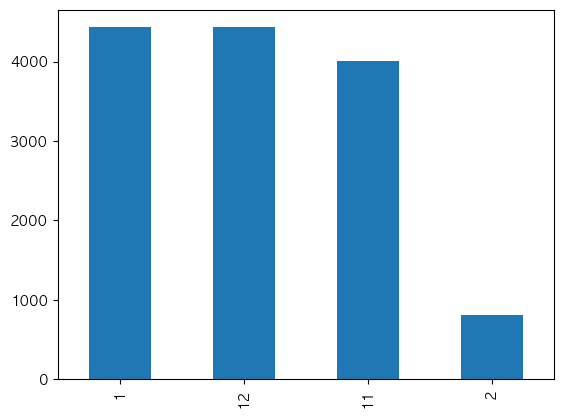

In [19]:
# 월별로 몇 개씩 데이터가 있는지 갯수를 세어 봅니다.
print(df_two['MONTH'].value_counts())

# 막대그래프로 시각화
df_two['MONTH'].value_counts().plot(kind='bar')
plt.show()

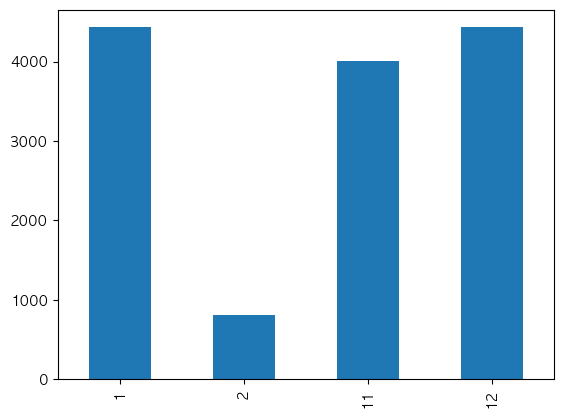

In [20]:
# 1월, 10월, 11월, 12월 순서대로 시각화하여 표현합니다.
df_two['MONTH'].value_counts().sort_index().plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='MONTH', ylabel='count'>

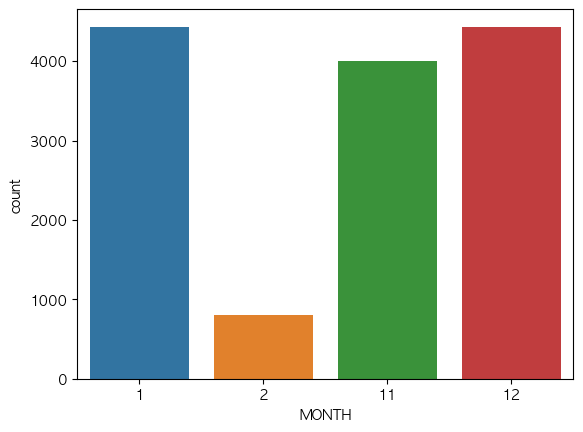

In [21]:
# seaborn 그래프로 시각화
sns.countplot(data=df_two, x='MONTH')

In [22]:
# 10분 동안의 유입자 수(평균)를 월별로 비교 
df_two.groupby(['MONTH'])['INCOUNT'].mean()

MONTH
1     2461.604331
2     2085.615385
11    8620.596404
12    2443.646515
Name: INCOUNT, dtype: float64

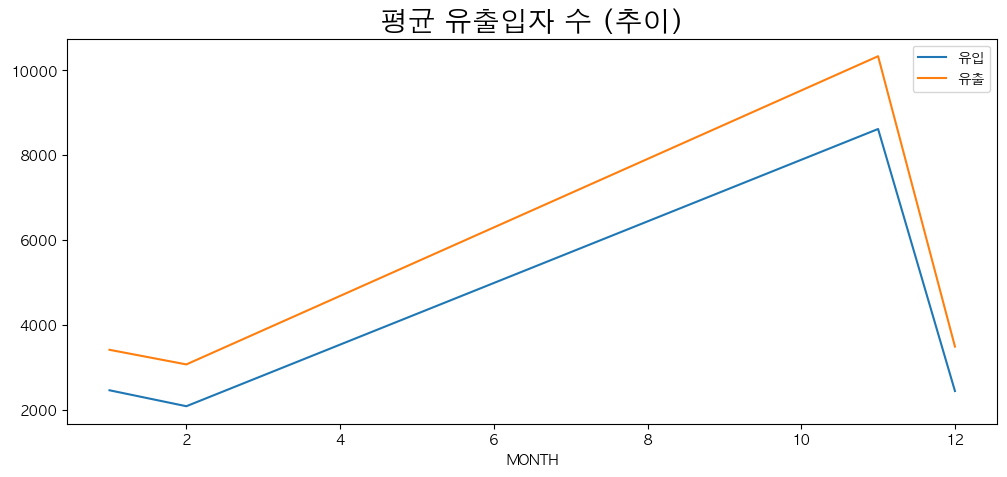

In [23]:
# 10분 동안의 유입자 수, 유출자 수를 월별 추이로 시각화하여 비교 (평균값 활용)
plt.figure(figsize=(12, 5))
df_two.groupby(['MONTH'])['INCOUNT'].mean().plot(label='유입')
df_two.groupby(['MONTH'])['OUTCOUNT'].mean().plot(label='유출')
plt.title('평균 유출입자 수 (추이)', fontsize=20)
plt.legend()
plt.show()

In [24]:
# 월별 유입자 수 (월별 합계)
df_two.groupby(['MONTH'])['INCOUNT'].sum()

MONTH
1     10912292.0
2      1681006.0
11    34516868.0
12    10832685.0
Name: INCOUNT, dtype: float64

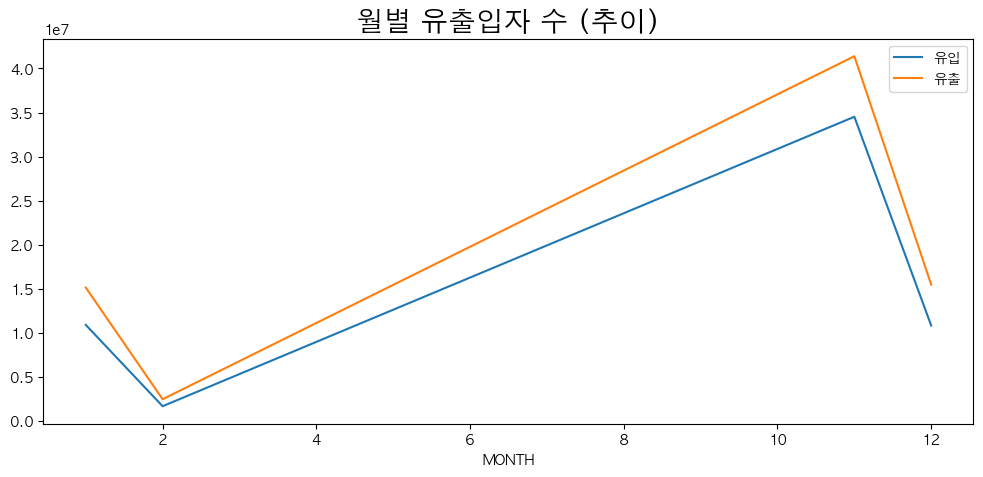

In [25]:
# 유입자 수, 유출자 수를 월별 추이로 시각화하여 비교 (월별 합계)
plt.figure(figsize=(12, 5))
df_two.groupby(['MONTH'])['INCOUNT'].sum().plot(label='유입')
df_two.groupby(['MONTH'])['OUTCOUNT'].sum().plot(label='유출')
plt.title('월별 유출입자 수 (추이)', fontsize=20)
plt.legend()
plt.show()

In [26]:
# 유입자 수 (누적 합계)
df_two.groupby(['MONTH'])['INCOUNT'].sum().cumsum()

MONTH
1     10912292.0
2     12593298.0
11    47110166.0
12    57942851.0
Name: INCOUNT, dtype: float64

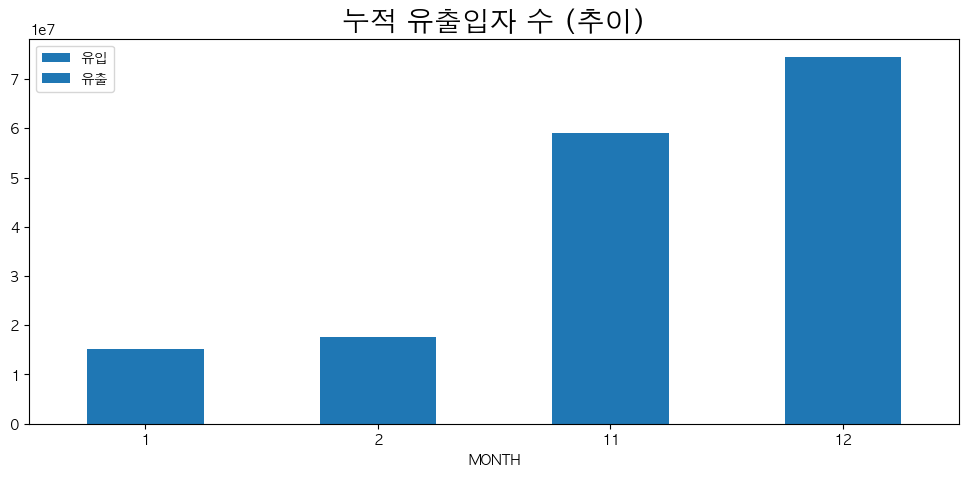

In [27]:
plt.figure(figsize=(12, 5))
df_two.groupby(['MONTH'])['INCOUNT'].sum().cumsum().plot(kind='bar', label='유입')
df_two.groupby(['MONTH'])['OUTCOUNT'].sum().cumsum().plot(kind='bar', label='유출')
plt.title('누적 유출입자 수 (추이)', fontsize=20)
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()

In [28]:
# 점심 시간(오전 11시 ~ 오후 1시) 데이터를 선택
lunch_time_mask = (df_two['HOUR'] >= 11) & (df_two['HOUR'] < 13) 
df_lunch = df_two[lunch_time_mask]
df_lunch.head()

,DEVICEID,DEVICENAME,DESCRIPTION,ENDTIME,INCOUNT,OUTCOUNT,TOTAL,INFLOW,YEAR,MONTH,DAY,WEEKDAY_NUM,HOUR
STARTTIME,,,,,,,,,,,,,
2022-12-02 11:30:42,2.0,계동길 69,계동교회 앞,2022-12-02 11:40:42,3193.0,4279.0,7472.0,-1086.0,2022,12,2,4,11
2022-12-03 12:00:40,2.0,계동길 69,계동교회 앞,2022-12-03 12:10:40,5827.0,7344.0,13171.0,-1517.0,2022,12,3,5,12
2022-12-02 11:40:42,2.0,계동길 69,계동교회 앞,2022-12-02 11:50:42,3490.0,4569.0,8059.0,-1079.0,2022,12,2,4,11
2022-12-02 11:50:42,2.0,계동길 69,계동교회 앞,2022-12-02 12:00:42,3781.0,4852.0,8633.0,-1071.0,2022,12,2,4,11
2022-12-03 12:10:41,2.0,계동길 69,계동교회 앞,2022-12-03 12:20:41,5857.0,7375.0,13232.0,-1518.0,2022,12,3,5,12


In [29]:
# 10분 동안의 유입자 수(최솟값)를 요일별로 비교 
df_lunch.groupby(['WEEKDAY_NUM'])['INCOUNT'].min()

WEEKDAY_NUM
0    404.0
1    284.0
2    398.0
3    505.0
4    529.0
5    264.0
6    250.0
Name: INCOUNT, dtype: float64

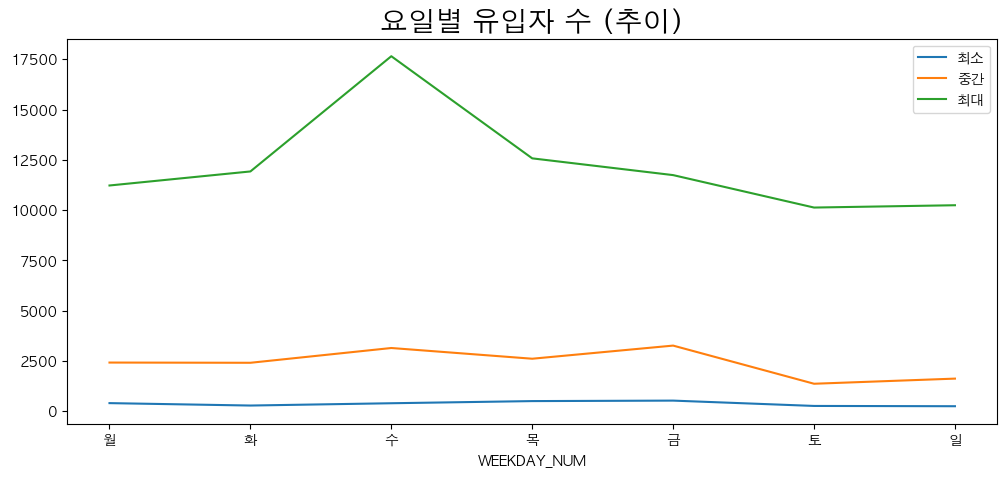

In [30]:
# 10분 동안의 유입자 수의 요일별 최솟값, 중간값, 최대값을 시각화하여 비교
plt.figure(figsize=(12, 5))
df_lunch.groupby(['WEEKDAY_NUM'])['INCOUNT'].min().plot(label='최소')
df_lunch.groupby(['WEEKDAY_NUM'])['INCOUNT'].median().plot(label='중간')
df_lunch.groupby(['WEEKDAY_NUM'])['INCOUNT'].max().plot(label='최대')

plt.title('요일별 유입자 수 (추이)', fontsize=20)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['월', '화', '수', '목', '금', '토', '일'])
plt.legend(loc='upper right')
plt.show()

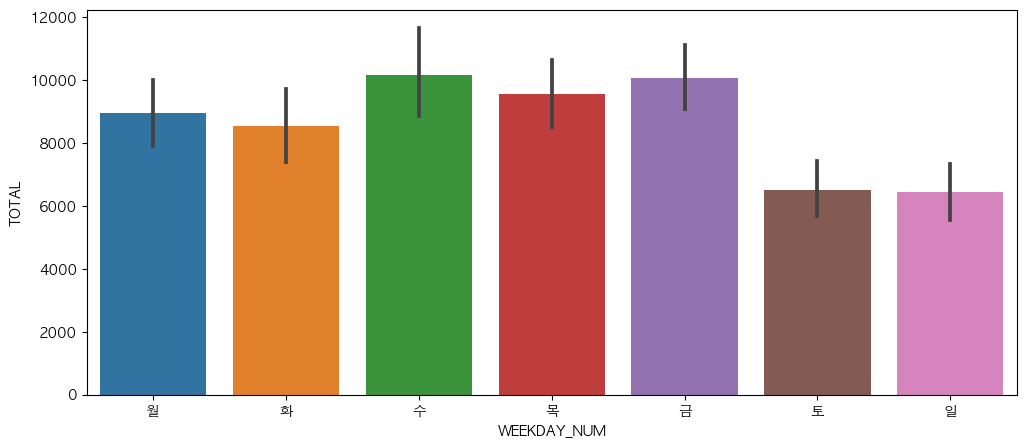

In [31]:
# 총유동인구를 요일별로 시각화하여 비교 (10분 동안의 데이터들의 평균)
plt.figure(figsize=(12, 5))
sns.barplot(data=df_lunch, x='WEEKDAY_NUM', y='TOTAL', estimator=np.mean)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['월', '화', '수', '목', '금', '토', '일'])
plt.show()

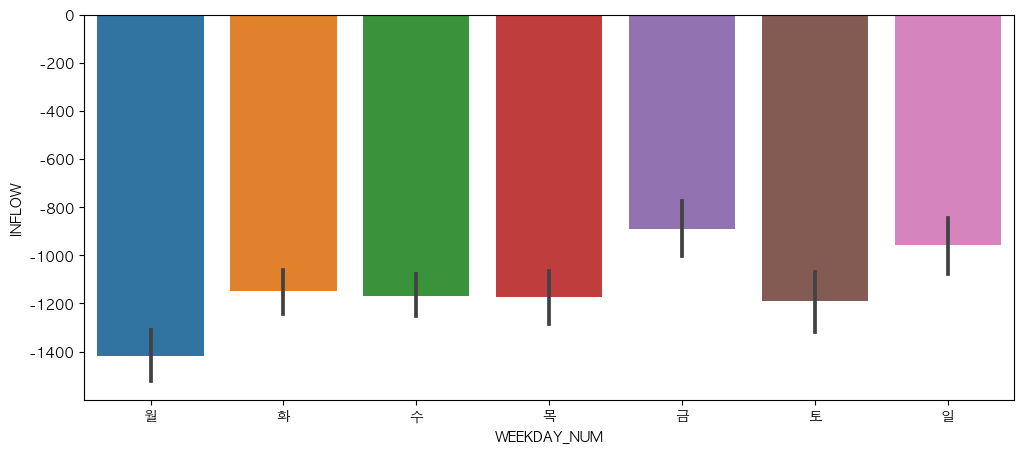

In [32]:
# 순유입자 수를 요일별로 시각화하여 비교 (10분 동안의 데이터들의 평균)
plt.figure(figsize=(12, 5))
sns.barplot(data=df_lunch, x='WEEKDAY_NUM', y='INFLOW', estimator=np.mean)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['월', '화', '수', '목', '금', '토', '일'])
plt.show()

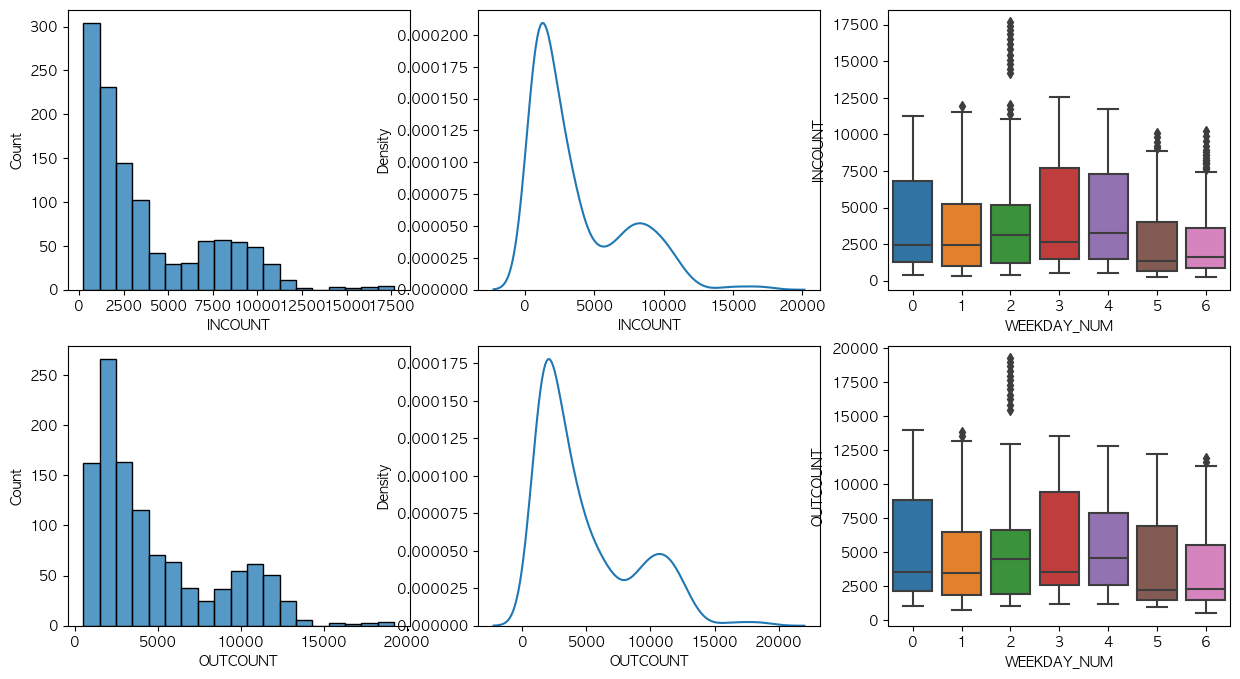

In [34]:
# 10분 동안의 유입자 수, 유출자 수의 분포를 히스토그램, 밀도함수, 상자그림으로 시각화하여 분석
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

sns.histplot(data=df_lunch, x='INCOUNT', ax=axes[0, 0])
sns.kdeplot(data=df_lunch, x='INCOUNT', ax=axes[0, 1])
sns.boxplot(data=df_lunch, x='WEEKDAY_NUM', y='INCOUNT', ax=axes[0, 2])

sns.histplot(data=df_lunch, x='OUTCOUNT', ax=axes[1, 0])
sns.kdeplot(data=df_lunch, x='OUTCOUNT', ax=axes[1, 1])
sns.boxplot(data=df_lunch, x='WEEKDAY_NUM', y='OUTCOUNT', ax=axes[1, 2])

plt.show()

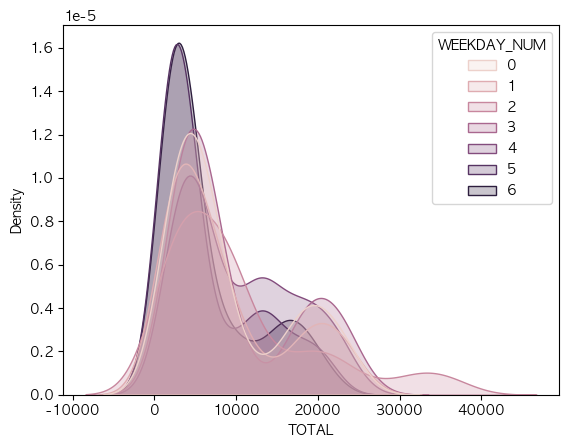

In [35]:
# 요일별 총유동인구 숫자를 밀도함수 그래프를 이용하여 비교 (kdeplot 함수, hue 옵션, fill=True)
sns.kdeplot(data=df_lunch, x='TOTAL', hue='WEEKDAY_NUM', fill=True)
plt.show()

In [36]:
df_two.tail()

,DEVICEID,DEVICENAME,DESCRIPTION,ENDTIME,INCOUNT,OUTCOUNT,TOTAL,INFLOW,YEAR,MONTH,DAY,WEEKDAY_NUM,HOUR
STARTTIME,,,,,,,,,,,,,
2023-02-06 14:20:41,2.0,계동길 69,계동교회 앞,2023-02-06 14:30:41,4965.0,5963.0,10928.0,-998.0,2023,2,6,0,14
2023-02-06 14:30:41,2.0,계동길 69,계동교회 앞,2023-02-06 14:40:41,5037.0,6070.0,11107.0,-1033.0,2023,2,6,0,14
2023-02-06 14:40:41,2.0,계동길 69,계동교회 앞,2023-02-06 14:50:41,5117.0,6166.0,11283.0,-1049.0,2023,2,6,0,14
2023-02-06 14:50:41,2.0,계동길 69,계동교회 앞,2023-02-06 15:00:41,5227.0,6269.0,11496.0,-1042.0,2023,2,6,0,14
2023-02-06 15:00:41,2.0,계동길 69,계동교회 앞,2023-02-06 15:10:41,5320.0,6367.0,11687.0,-1047.0,2023,2,6,0,15


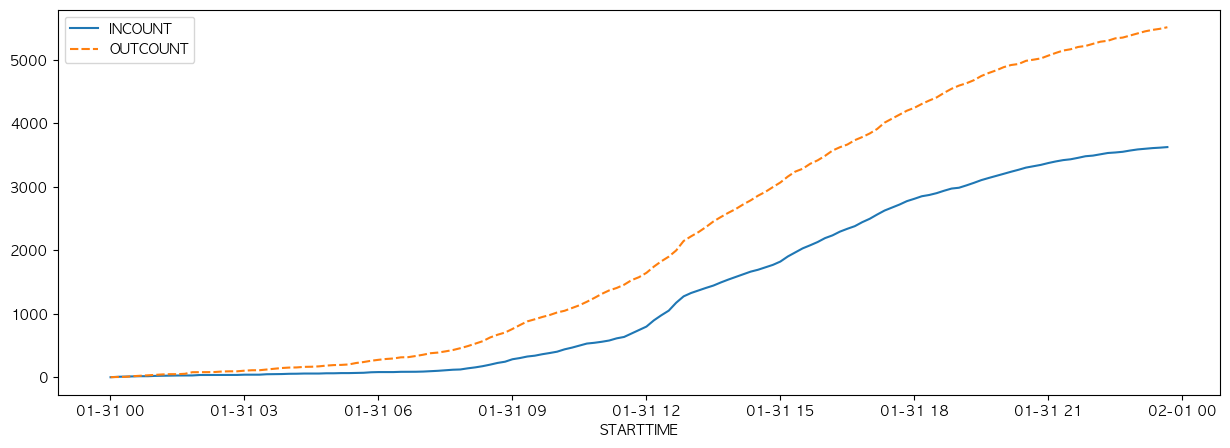

In [37]:
day_mask = (df_two['YEAR']==2023) & (df_two['MONTH']==1) & (df_two['DAY']==31) 
plt.figure(figsize=(15, 5))
sns.lineplot(df_two.loc[day_mask, 'INCOUNT':'OUTCOUNT'])
plt.show()